In [1]:
u = 1.35
graph = [
    (0.3461717838632017, 1.4984640297338632),
    (0.6316400411846113, 2.5754677320579895),
    (1.3906262250927481, 2.164978861396621),
    (0.66436005100802, 0.6717919819739032),
    (0.8663329771713457, 3.3876341010035995),
    (1.1643107343501296, 1.0823066243402013)
]

omega_max = 1.89
delta_0 = -1.0
delta_max = 1.0

dt = 0.001

In [2]:
from src.udmis import *
from copy import deepcopy

udmis = QuantumUDMIS(u, graph, omega_max, delta_0, delta_max)
udmis_init = deepcopy(udmis)

delta, omega, energy = [], [], []
for t in np.arange(0, 1, dt):
    delta.append(udmis.delta(t))
    omega.append(udmis.omega(t))
    energy.append(udmis.energy(1))
    udmis.state = udmis.time_evolution_step(t, 100*dt)

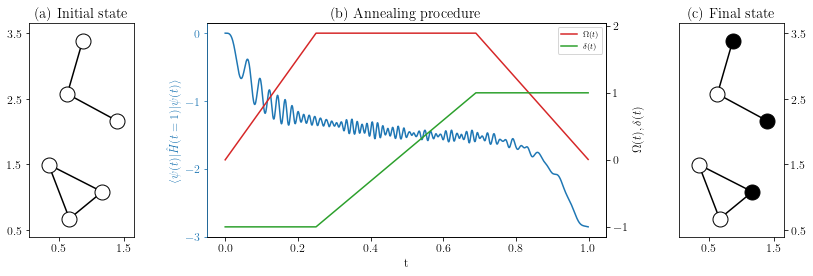

In [4]:
from src.figures import *

fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1, 4), (0, 0))
ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=2)
ax3 = plt.subplot2grid((1, 4), (0, 3))

plot_quantum_udmis(ax1, udmis_init)
plot_quantum_annealing(ax2, np.arange(0, 1, dt), energy, omega, delta)
plot_quantum_udmis(ax3, udmis)

ax1.set_title(r'(a) Initial state')
ax2.set_title(r'(b) Annealing procedure')
ax3.set_title(r'(c) Final state')
ax3.yaxis.tick_right()

fig.tight_layout()

# plt.savefig('../fig/quantum_annealing.pdf')